# Visualizing Data for Different Teams: London Bike Sharing System
### _by Michael Odartei Mills_

[SLIDE DECK](https://github.com/momills/elu_notebooks/blob/master/M2/M2_W5_SideDeck_Michael_O_Mills.ppt)

**Business Case**

>"The concept of bike sharing is to provide free or **affordable** access to bicycles for short-distance trips in an urban area as an alternative to motorised public transport or private vehicles, thereby reducing congestion, noise, and air pollution." ~ _[Wikipedea](https://en.wikipedia.org/wiki/Bicycle-sharing_system)_ 
   
   Over the past three years in China, I have come to experience the importance of bike-sharing services. I have also seen one new entry(Hello Bike) assume the lion's share in the market space and forcing the then market leader (OFO) into closure. I do not know the full details of the market, and therefore will attempt this project on some assumptions and observations that support my research on the subject thus far.
   
   As aforementioned, there are valid and strong social reasons for setting up a bike sharing service. However, as is the aim of every business to maximize profit while ensuring business continuity and high customer satisfaction, bike sharing companies also aim to be profitable whilst protecting the environment. 
   
   Though my experience with bike sharing is in the far east, I chose the [London Bike Sharing System dataset](https://www.kaggle.com/edenau/london-bike-sharing-system-data) because it's fits the purpose of this project for further analysis and visualization to be presented to the data team lead and CEO.
   
   _**This project does not include the cost of subscription or one-time use of bikes: it is assumed all bikes charge the same fee**_


**Problems**

The problems (in no specific order) to be addressed include but not limited to the following:
* What is the current number of bikes in the system?
* Which stations will be most profitable to have docking stations?
* What is the minimum and maximum travel time per session?
* What is the minimum and maximum distance travelled per session?
* What time of the day do people really use bike sharing services?
* Should a stations current capacity be increased?
* In impromptu shortage situations, which station is the best to have as backup supply?
* How do the variables correlate with each other? **

I believe, the above problems carefully handled can answer the main problem I identified below in my experience.
* How do we ensure that bikes are available where and when they are needed?

### The visualization below answers all above questions

In [1]:
import os # accessing directory structure
import matplotlib.pyplot as plt # plotting
import seaborn as sns # plotting
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
print(os.listdir('./Data'))

['journeys.csv', 'stations.csv']


In [3]:
for dirname, _, filenames in os.walk('/Data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

### Journeys Data set

In [4]:
#nRowsRead = None # specify 'None' if want to read whole file
# journeys.csv has 1542844 rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('./Data/journeys.csv')
df1.dataframeName = 'journeys.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1542844 rows and 14 columns


In [5]:
df1.head(5)

,Journey Duration,Journey ID,End Date,End Month,End Year,End Hour,End Minute,End Station ID,Start Date,Start Month,Start Year,Start Hour,Start Minute,Start Station ID
0,2040.0,953,19,9,17,18,0,478,19,9,17,17,26,251
1,1800.0,12581,19,9,17,15,21,122,19,9,17,14,51,550
2,1140.0,1159,15,9,17,17,1,639,15,9,17,16,42,212
3,420.0,2375,14,9,17,12,16,755,14,9,17,12,9,163
4,1200.0,14659,13,9,17,19,33,605,13,9,17,19,13,36


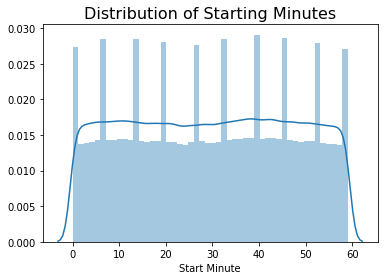

In [6]:
#plotCorrelationMatrix(df1, 8)
sns.distplot(df1['Start Minute'])
plt.title('Distribution of Starting Minutes', fontsize=16);

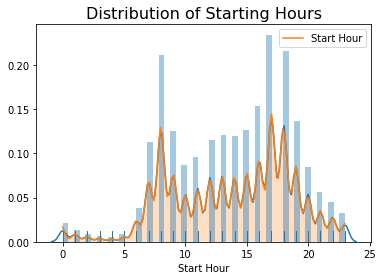

In [7]:
sns.distplot(df1['Start Hour'])
plt.title('Distribution of Starting Hours', fontsize=16);

#plotScatterMatrix(df2, 12, 10)

sns.kdeplot(df1['Start Hour'], shade=True, cut=0)
sns.rugplot(df1['Start Hour']);

From the above graphs, the minute of start remains normally distributed, however the start hour of journeys shows a very interesting info that shows riders mostly start riding at **8am** and again mostly move **5pm** and **6pm**. This pattern matches to that of a working population.

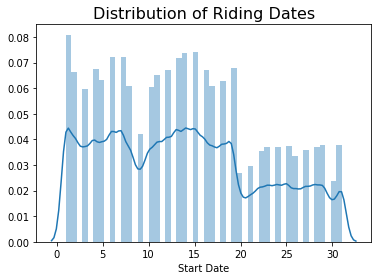

In [8]:
sns.distplot(df1['Start Date'])
plt.title('Distribution of Riding Dates', fontsize=16);

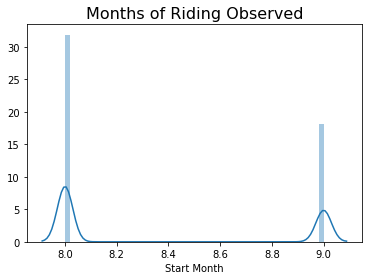

In [9]:
sns.distplot(df1['Start Month'])
plt.title('Months of Riding Observed', fontsize=16);

The above graphs shows that the observation data was collected over two months **August** and **September**. The general pattern is that bikes were most patronized in *first 20 days of each month*, with higher patronage in the former month. 

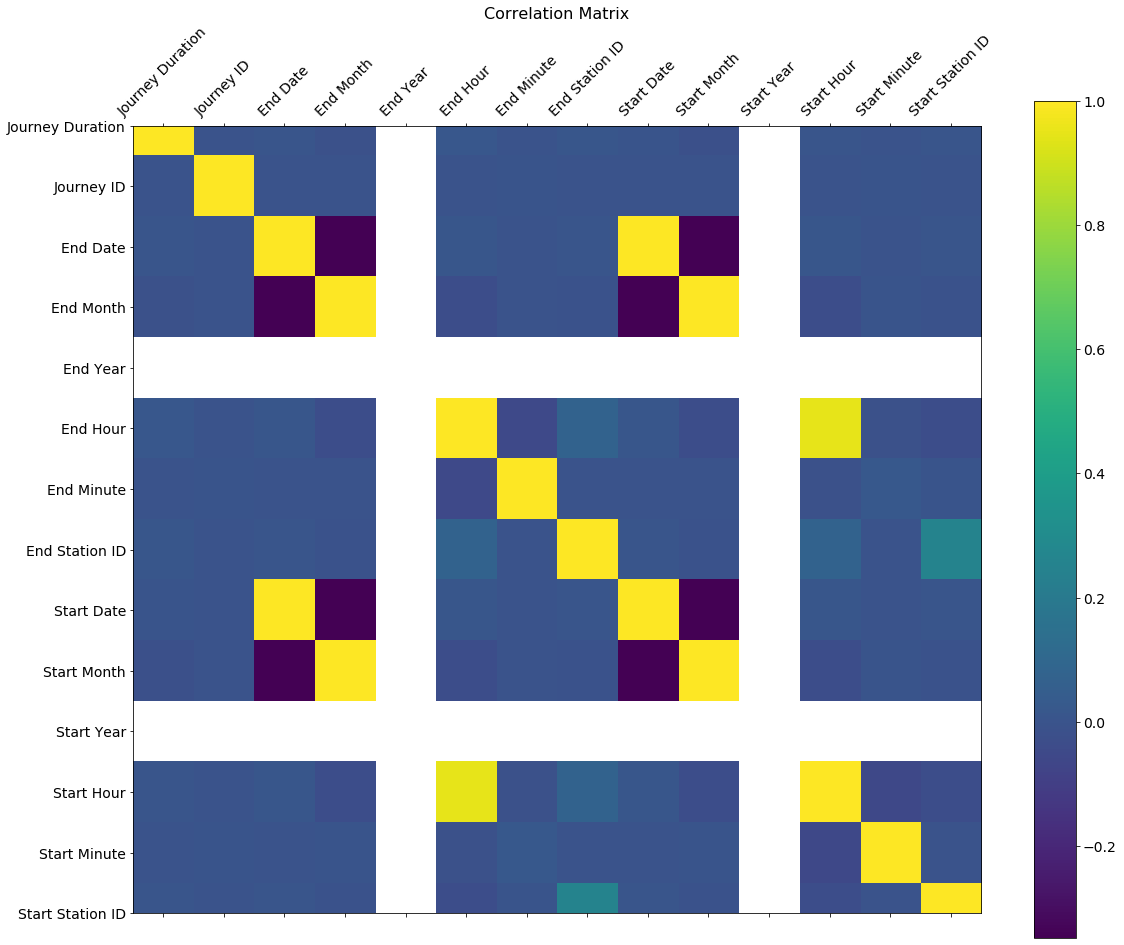

In [10]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df1.corr(), fignum=f.number)
plt.xticks(range(df1.shape[1]), df1.columns, fontsize=14, rotation=45)
plt.yticks(range(df1.shape[1]), df1.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16, y=1.0);

The correlation matrix above simply graphically represents the correlation of each variable against every other variable, when against itself, correlation is 1, hence yellow color(typically the diagonal). 
End year, Start year are the same no matter what hence blank colour.
Start month/start date and End month/end date(vice versa applies for both) have a negative absolute correlation.

In [11]:
df2 = pd.read_csv('./Data/stations.csv')
df2.dataframeName = 'stations.csv'
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 773 rows and 5 columns


In [12]:
df2.head(5)

,Station ID,Capacity,Latitude,Longitude,Station Name
0,1,19,51.529163,-0.109970,"River Street , Clerkenwell"
1,2,37,51.499606,-0.197574,"Phillimore Gardens, Kensington"
2,3,32,51.521283,-0.084605,"Christopher Street, Liverpool Street"
3,4,23,51.530059,-0.120973,"St. Chad's Street, King's Cross"
4,5,27,51.493130,-0.156876,"Sedding Street, Sloane Square"


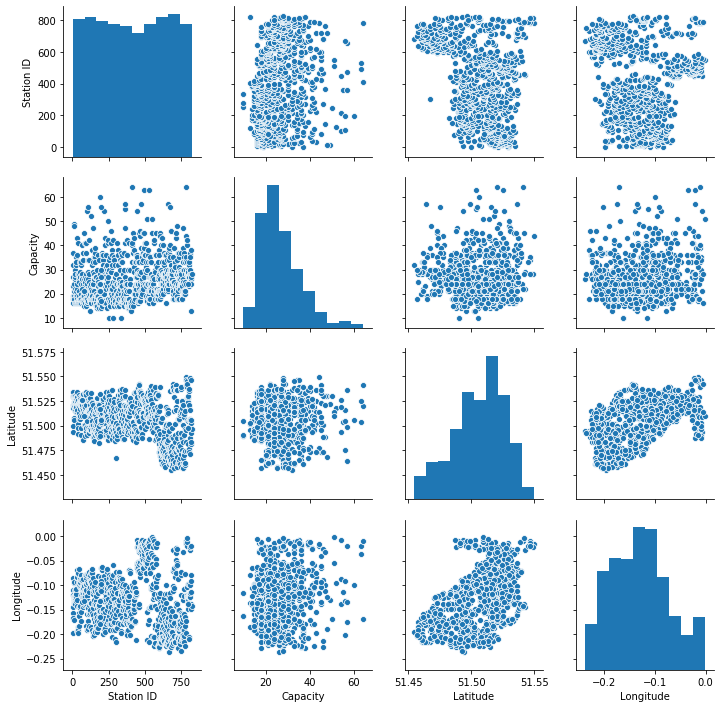

In [13]:
#plotPerColumnDistribution(df2, 10, 5)

#visual = sns.load_dataset(df2)
sns.pairplot(df2);

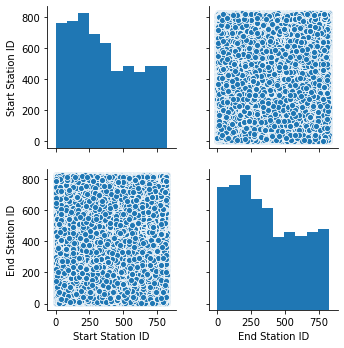

In [14]:
sns.pairplot(df1, vars=['Start Station ID','End Station ID']);

### Stations Dataset
df2 is the dataframe from the stations.csv, its sole purpose is to generate the actual names of the stations that make up the list to be focused on as optimal solution.

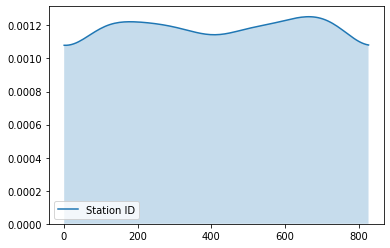

In [15]:
#plotScatterMatrix(df2, 12, 10)

sns.kdeplot(df2['Station ID'], shade=True, cut=0);
#sns.rugplot(df2['Station ID']);

In [16]:
#first 10 stations of first 400 stations with the help of stations dataframe
df2[df2['Station ID'] < 400][['Station Name']].head(10)

,Station Name
0,"River Street , Clerkenwell"
1,"Phillimore Gardens, Kensington"
2,"Christopher Street, Liverpool Street"
3,"St. Chad's Street, King's Cross"
4,"Sedding Street, Sloane Square"
5,"Broadcasting House, Marylebone"
6,"Charlbert Street, St. John's Wood"
7,"Lodge Road, St. John's Wood"
8,"New Globe Walk, Bankside"
9,"Park Street, Bankside"


In [17]:
#last 10 stations of first 400 stations
df2[df2['Station ID'] < 400][['Station Name']].tail(10)

,Station Name
763,"Euston Road, Euston"
764,"Panton Street, West End"
765,"Queen's Gate (South), South Kensington"
766,"Nutford Place, Marylebone"
767,"Claremont Square, Angel"
768,"Rampayne Street, Pimlico"
769,"Hop Exchange, The Borough"
770,"Milroy Walk, South Bank"
771,"Union Street, The Borough"
772,"Stamford Street, South Bank"


## Conclusion

From the visualizations generated it could be concluded that:
1. Most patronizers are working class folks who have a predictable peak period of usage.
2. The most populous stations are station IDs between 0 and 400.
3. To maintain the availability of bikes in peak periods, bikes could be moved from ID above 400 to those closer to 0.

To ensure that bikes are available at **station IDs below 400** around the **peak periods 8am, 5pm and 6pm**.